# T-DeepInsight Code Vignette

<div class="alert alert-info">

**Note**
    
In Jupyter notebooks and lab, you can see the documentation for a python function by hitting ``SHIFT + TAB``. Hit it twice to expand the view.

</div>

The TCR-DeepInsight is a module that can perform **GEX** / **TCR** joint analysis.


To get started, simply import the package:

In [1]:
cd ..

/rsch/Snowxue/TCR-DeepInsight


In [2]:
import t_deep_insight as tdi

/home/ziweixue/anaconda3/envs/faiss-gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [ ]:
# TDI provides native fonts for plotting, Arial and Graphik
plt.rcParams['font.family'] = 'Graphik'
# plt.rcParams['font.family'] = 'arial'

## Training new reference datasets

### Training GEX reference from huARdb v2 collections

<div class="alert alert-primary">

The GEX data is stored in an .h5ad file, which contains **raw gene expression matrix** and meta informations including **study_name**, **sample_name**, and other annotations. For convenience, the full-length TCR sequence is also loaded to the GEX adata.


</div>

In [3]:
gex_reference_adata = tdi.data.human_gex_reference_v2()

In [7]:
gex_reference_adata

AnnData object with n_obs × n_vars = 1017877 × 6000
    obs: 'IR_VJ_1_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'individual', 'cell_subtype', 'disease', 'disease_type', 'tcr', 'cell_type_1', 'cell_type_2', 'cell_type_3', 'study_name', 'sample_name', 'disease_type_1', 'disease_type_2'
    obsm: 'X_gex'

Here we use the reference GEX data from the paper, which contains 1,017,877 T cells from various studies and diseases.

<div class="alert alert-info">

**Note**
    
The adata.obs.index is set to [`BARCODE`]-[`STUDY_NAME`]-[`SAMPLE_NAME`] for obs uniqueness

    
adata.obs.columns:
    <ul>
        <li><code>IR_VJ_1_junction_aa</code>: The CDR3a amino acid sequence</li>
        <li><code>IR_VDJ_1_junction_aa</code>: The CDR3b amino acid sequence</li>
        <li><code>IR_VJ_1_v_call</code>: The TRAV gene</li>
        <li><code>IR_VDJ_1_v_call</code>: The TRBV gene</li>
        <li><code>IR_VJ_1_j_call</code>: The TRAJ gene</li>
        <li><code>IR_VDJ_1_j_call</code>: The TRBJ gene</li>
        <li><code>individual</code>: The unique individual ID</li>
        <li><code>sample_name</code>: The unique sample ID</li>
        <li><code>study_name</code>: The unique study ID</li>
 
</div>


In [8]:
gex_reference_adata.obs

,IR_VJ_1_junction_aa,IR_VDJ_1_junction_aa,IR_VJ_1_v_call,IR_VJ_1_j_call,IR_VDJ_1_v_call,IR_VDJ_1_j_call,individual,cell_subtype,disease,disease_type,tcr,cell_type_1,cell_type_2,cell_type_3,study_name,sample_name,disease_type_1,disease_type_2
AAACCTGAGAAACCAT-Wen_2020-HC1,CAVRDNTNAGKSTF,CASSKHPDRYEQYF,TRAV1-2,TRAJ27,TRBV7-9,TRBJ2-7,HC1,NaN,Healthy,Healthy,CAVRDNTNAGKSTF=CASSKHPDRYEQYF=TRAV1-2=TRAJ27=T...,Naive CD4,Naive CD4,CD4,Wen_2020,HC1,Healthy,Healthy
AAACCTGAGAAACCAT-Yost_2019-su012_post_Tcell,CAALFSDGQKLLF,CASSLRQGAGSNQPQHF,TRAV39,TRAJ16,TRBV5-5,TRBJ1-5,su012,NaN,Basal cell carinoma tumor,Solid tumor,CAALFSDGQKLLF=CASSLRQGAGSNQPQHF=TRAV39=TRAJ16=...,CD4,CD4,CD4,Yost_2019,su012_post_Tcell,Solid tumor,Solid tumor
AAACCTGAGAAAGTGG-Gao_2020-HD5,CAASRGDNDMRF,CASSLRATDTQYF,TRAV13-1,TRAJ43,TRBV7-9,TRBJ2-3,HD5,NaN,Healthy,Healthy,CAASRGDNDMRF=CASSLRATDTQYF=TRAV13-1=TRAJ43=TRB...,CD4,CD4,CD4,Gao_2020,HD5,Healthy,Healthy
AAACCTGAGAAAGTGG-Gao_2020-UPN18_post,CAARVQGAQKLVF,CAWSVPRGLDEQYF,TRAV29DV5,TRAJ54,TRBV30,TRBJ2-7,UPN18,NaN,Large granular lymphocyte leukemia,T-LGLL,CAARVQGAQKLVF=CAWSVPRGLDEQYF=TRAV29DV5=TRAJ54=...,CD4,CD4,CD4,Gao_2020,UPN18_post,T-LGLL,T-LGLL
AAACCTGAGAAAGTGG-Krishna_2021-IpiNivo_Mixed_PBMC,CAASEGAGGFKTIF,CASRSDRGPNQPQHF,TRAV29DV5,TRAJ9,TRBV28,TRBJ1-5,IpiNivo_Mixed,NaN,Clear cell renal cell carcinoma,Solid tumor,CAASEGAGGFKTIF=CASRSDRGPNQPQHF=TRAV29DV5=TRAJ9...,CD4,CD4,CD4,Krishna_2021,IpiNivo_Mixed_PBMC,Solid tumor,Solid tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCATCTGCC-Simone_2021-AS02_SF,CLPVSGWEGGGNKLTF,CASSLDSPEQYF,TRAV26-1,TRAJ10,TRBV5-4,TRBJ2-7,AS02,GZMK+ Tex,Ankylosing spondylitis,Inflammation,CLPVSGWEGGGNKLTF=CASSLDSPEQYF=TRAV26-1=TRAJ10=...,CD8,CD8,CD8,Simone_2021,AS02_SF,Inflammation,Ankylosing spondylitis
TTTGTCAAGCGTAATA-Simone_2021-AS02_SF,CAMKGNAGNNRKLIW,CASSWTGVISGNTIYF,TRAV14DV4,TRAJ38,TRBV5-5,TRBJ1-3,AS02,Cycling T,Ankylosing spondylitis,Inflammation,CAMKGNAGNNRKLIW=CASSWTGVISGNTIYF=TRAV14DV4=TRA...,Cycling,Cycling,Undefined,Simone_2021,AS02_SF,Inflammation,Ankylosing spondylitis
TTTGTCAAGCTGTCTA-Simone_2021-AS02_SF,CAERDGYSTLTF,CSARARSYNEQFF,TRAV5,TRAJ11,TRBV20-1,TRBJ2-1,AS02,GZMK+ Tex,Ankylosing spondylitis,Inflammation,CAERDGYSTLTF=CSARARSYNEQFF=TRAV5=TRAJ11=TRBV20...,CD8,CD8,CD8,Simone_2021,AS02_SF,Inflammation,Ankylosing spondylitis
TTTGTCACATCACGTA-Simone_2021-AS02_SF,CVVRKPQDYNNARLMF,CASSLGGSYNEQFF,TRAV8-2,TRAJ31,TRBV27,TRBJ2-1,AS02,Cycling T,Ankylosing spondylitis,Inflammation,CVVRKPQDYNNARLMF=CASSLGGSYNEQFF=TRAV8-2=TRAJ31...,CD8,CD8,CD8,Simone_2021,AS02_SF,Inflammation,Ankylosing spondylitis


The `VAEModel` for GEX can be easily set up by the following code. The **sample_name** is set for the batch key for correcting batch effects.

In [9]:
vae_model = tdi.model.VAEModel(
    adata=gex_reference_adata, 
    batch_key="sample_name", 
    device='cuda:1'
)

Mon Jun 26 14:10:23 2023	Initializing dataset into memory
Mon Jun 26 14:10:24 2023	warning: the provided n_batch=0 does not match the number of batch in the adata.
Mon Jun 26 14:10:24 2023	setting n_batch to 437


Fitting the VAE model is ultra-fast with GPU support. We use 16 epoch to train the VAE model even if the number of cells is large (> 1 million). The training time often last ~15min with GPU acceleration.

In [10]:
vae_model.fit(
    max_epoch=16,
    lr=1e-4,
    n_per_batch=256
)

Epoch 16: 100%|██████████████████████████| 16/16 [20:45<00:00, 77.83s/it, loss=3.36e+05, reconst=3.33e+05, kldiv=2.96e+03]


In [ ]:
vae_model.save_to_disk("/path/to/vae_checkpoint")

The latent embedding from the VAE model can be easily obtained and projected to 2D dimension.

In [12]:
gex_reference_adata.obsm["X_gex"] = vae_model.get_latent_embedding()

In [ ]:
gex_reference_adata.obsm["X_umap"] = tdi.ut.get_default_umap_reducer().fit_transform(
    gex_reference_adata.obsm["X_gex"]
)

<div class="alert alert-info" style='background-color: #7252EE; color:white !important'>

**Note**
    
Alternatively, you may want to use RAPIDS for accelerated UMAP calculation.
<p>see <a style='color:white' href="https://docs.rapids.ai/api/cuml/stable/api/">RAPIDS</a> for more information</p>
    
</div>


In [ ]:
import umap
gex_reference_adata.obsm["X_umap"] = tdi.ut.get_default_cuml_umap_reducer().fit_transform(
    gex_reference_adata.obsm["X_gex"]
)

Display the VAE embedding in 2D space

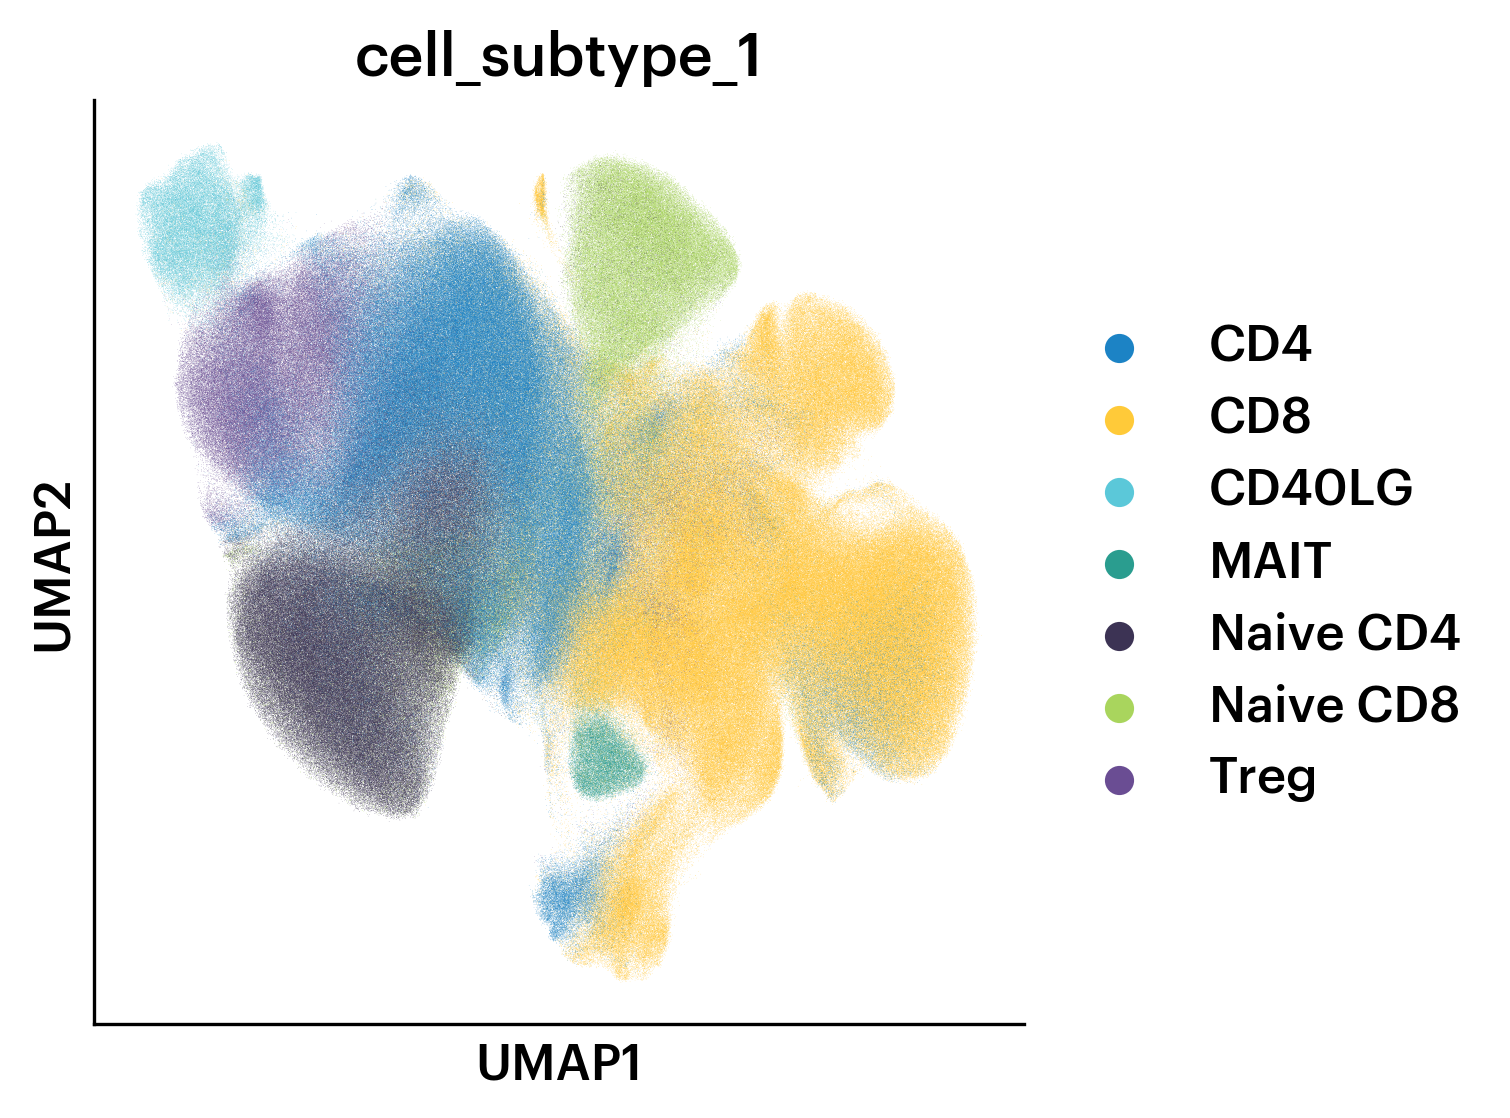

In [5]:
fig,ax = tdi.pl.create_fig((4,4))
tdi.pl.umap(
    gex_reference_adata, 
    color='cell_subtype_1', 
    palette=tdi.pl.palette.huardb_annotation_low_cmap,
    ax=ax
)

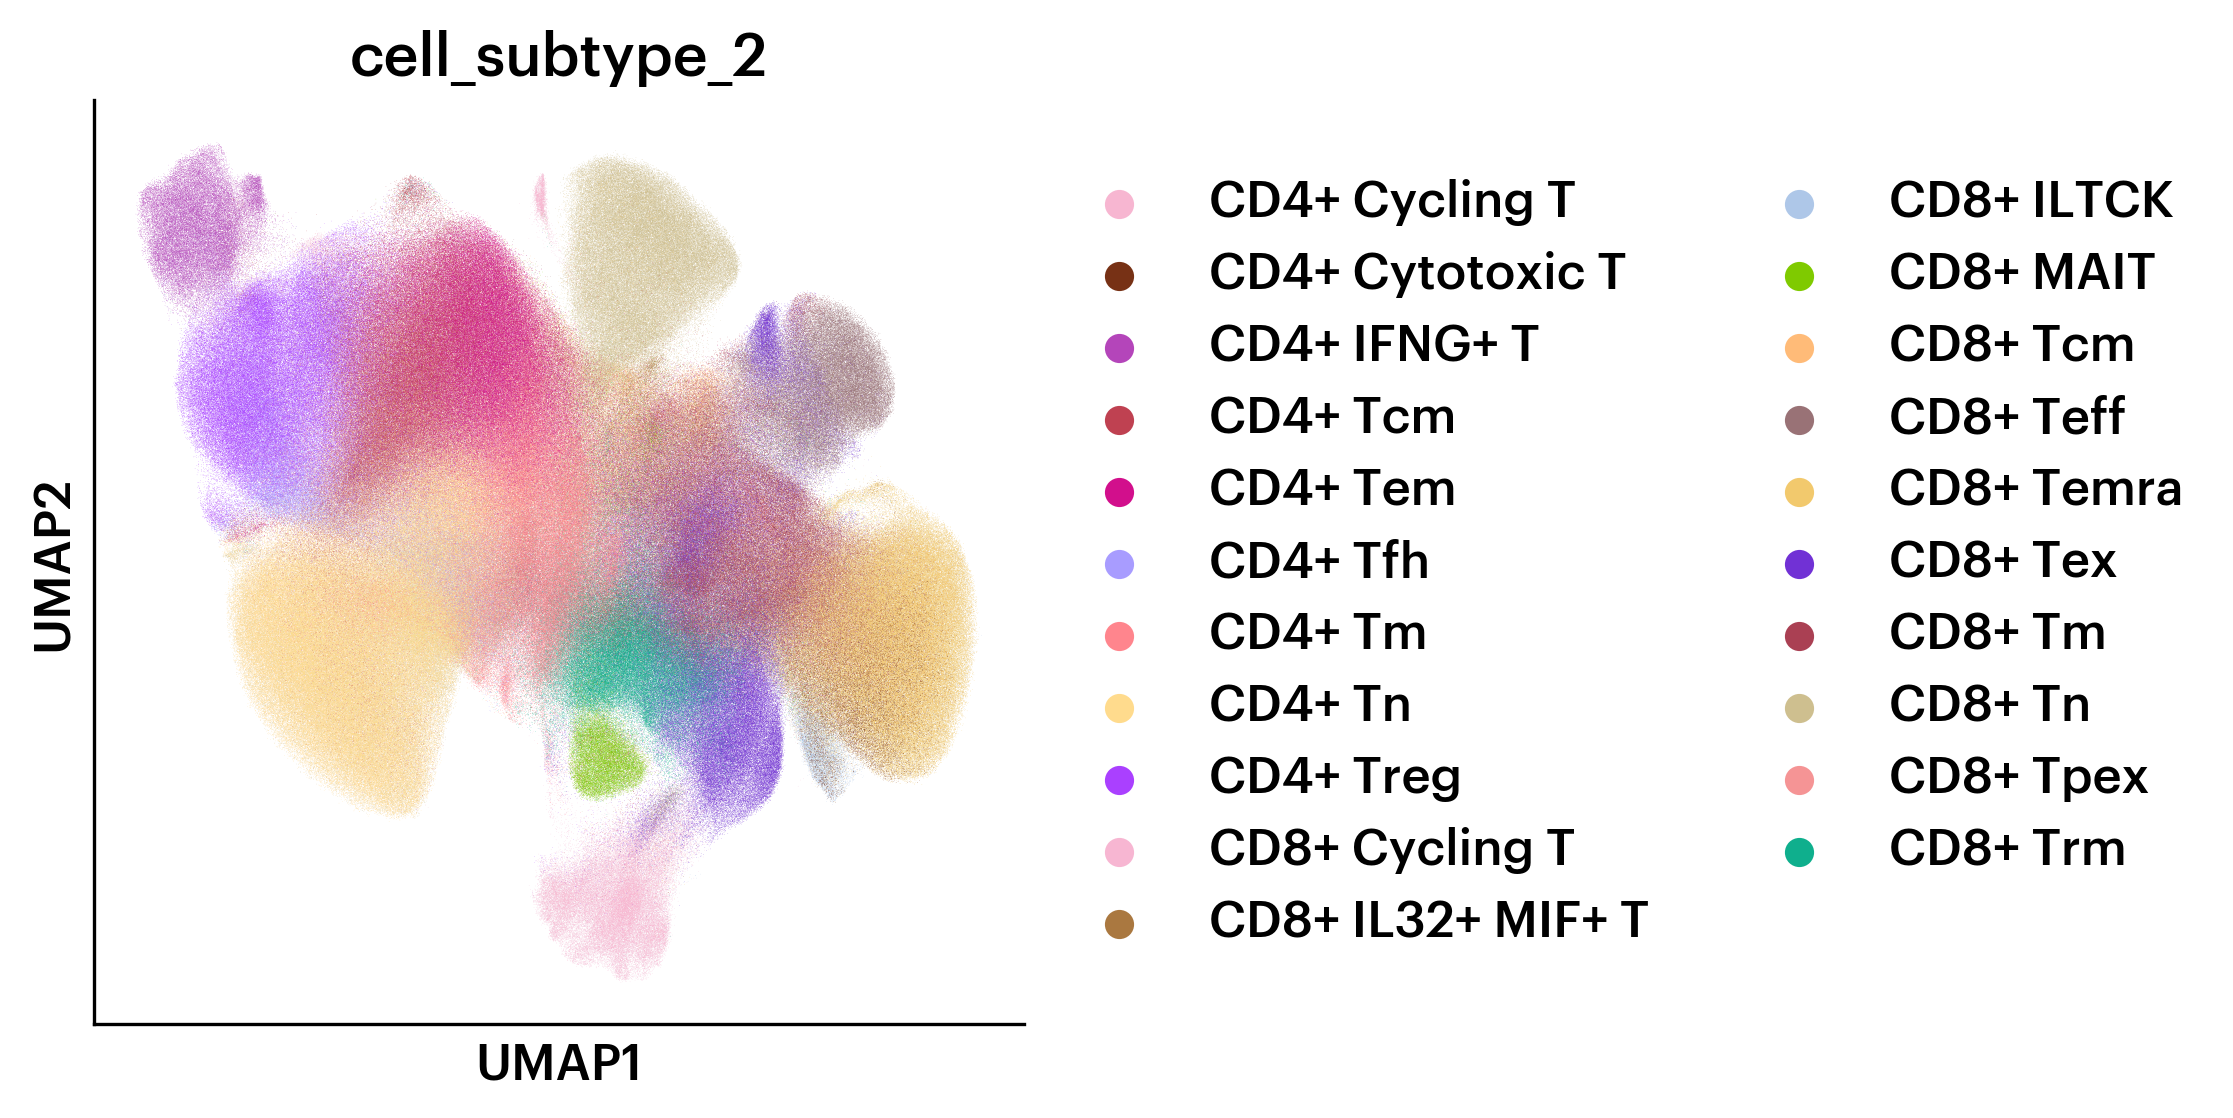

In [4]:
import matplotlib.pyplot as plt
fig,ax = tdi.pl.create_fig((4,4))
tdi.pl.umap(
    gex_reference_adata, 
    color='cell_subtype_2', 
    palette=tdi.pl.palette.huardb_annotation_high_cmap,
    ax=ax
)

### Training Cross-atlas GEX reference
- huARdb v2 collections, 
- Zheng et al. (2022) pan-cancer datasets
- Chu et al., (2023) pan cancer datasets 
- Magen et al., (2023) Hepatocellular carcinoma datasets

In [ ]:
gex_reference_adata_cd8 = tdi.data.human_gex_multi_atlas_v1_cd8()

In [ ]:
vae_model = tdi.model.VAEModel(
    adata=gex_reference_adata_cd8,
    batch_key="sample_name", 
    additional_batch_keys=["study_name"],
    batch_embedding='embedding', 
    device='cuda:0', 
    batch_hidden_dim=64,
    new_adata_key='undefined',
    label_key='label_1',
    additional_label_keys = ['label_2','label_3','label_4']
)

In [ ]:
vae_model.fit(
    max_epoch=8, 
    lr=5e-5
 )

In [ ]:
gex_reference_adata_cd4 = tdi.data.human_gex_multi_atlas_v1_cd4()

In [ ]:
vae_model = tdi.model.VAEModel(
    adata=gex_reference_adata_cd4,
    batch_key="sample_name", 
    additional_batch_keys=["study_name"],
    batch_embedding='embedding', 
    device='cuda:0', 
    batch_hidden_dim=64,
    new_adata_key='undefined',
    label_key='label_1',
    additional_label_keys = ['label_2','label_3','label_4']
)

In [ ]:
vae_model.fit(
    max_epoch=8, 
    lr=5e-5
 )

### Training TCR reference

Similar to the GEX data, we store the TCR data in a .h5ad file, which contains the full-length 
TCR sequence. We aggregate the TCR sequence by **individual** to obtain unique clonotypes.

In [6]:
tcr_reference_adata = tdi.data.human_tcr_reference_v2()

Alternatively, this can be converted by `gex_reference_data`. Make sure that `individual` are in the columns of gex_reference_adata.obs. `unique_tcr_by_individual` groups the T cells by (clonotype)-(individual) and aggregate the GEX embedding (`gex_reference_adata.obsm['X_gex']`)

```
tdi.pp.update_anndata(gex_reference_adata)
tcr_reference_adata = tdi.pp.unique_tcr_by_individual(gex_reference_adata)
```

In [7]:
tcr_reference_adata.obs

,CDR3a,CDR3b,TRAV,TRAJ,TRBV,TRBJ,cell_subtype_0,cell_subtype_1,disease_type_1,disease_type_2,individual,number_of_cell
0,CAAAADSSYKLIF,CASTFHRDRYGYTF,TRAV29DV5,TRAJ12,TRBV5-4,TRBJ1-2,CD4,CD4,Allergic rhinitis,Others,AR50,1
1,CAAAAGGTSYGKLTF,CASSRARGYEQYF,TRAV13-1,TRAJ52,TRBV19,TRBJ2-7,CD4,CD4,Allergic rhinitis,Others,AR50,1
2,CAAAAGNFNKFYF,CASTDSQETQYF,TRAV29DV5,TRAJ21,TRBV5-1,TRBJ2-5,CD8,CD8,Allergic rhinitis,Others,AR48,1
3,CAAAAGSARQLTF,CASSLARGWTGELFF,TRAV29DV5,TRAJ22,TRBV5-5,TRBJ2-2,CD8,CD8,Allergic rhinitis,Others,AR50,1
4,CAAAAIIQGAQKLVF,CASSGLGHGLNSPLHF,TRAV29DV5,TRAJ54,TRBV9,TRBJ1-6,CD4,CD4,Allergic rhinitis,Others,AR25,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1491807,CVVSSNDYKLSF,CASGWGGPDYGYTF,TRAV8-2,TRAJ20,TRBV12-5,TRBJ1-2,CD8,Naive CD8,Solid tumor,Others,RB-P1,1
1491808,CVVSSPSGNTPLVF,CASRGSSVYTF,TRAV10,TRAJ29,TRBV12-4,TRBJ1-2,CD8,CD8,Solid tumor,Others,RB-P2,1
1491809,CVVSVDWGYQKVTF,CASSLSGVAGRLETQYF,TRAV10,TRAJ13,TRBV27,TRBJ2-5,CD8,Naive CD8,Solid tumor,Others,RB-P1,1
1491810,CVVSVMTTDSWGKLQF,CASSLFPRTSSYNEQFF,TRAV8-2,TRAJ24,TRBV7-4,TRBJ2-1,CD8,CD8,Solid tumor,Others,RB-P2,2


We implemented a tokenizer for the full-length TCR sequence.

In [9]:
tcr_tokenizer = tdi.model.default_tokenizer(
    species='human',
    tra_max_length=48,
    tra_max_length=48
)

tcr_dataset = tdi.model.tcr_adata_to_datasets(tcr_reference_adata, tcr_tokenizer)

If the dataset is for training, we can split the dataset into train and test set.

In [10]:
# Train Test Split
tcr_dataset = tcr_dataset['train'].train_test_split(0.05)

Parameter 'generator'=Generator(PCG64) of the transform datasets.arrow_dataset.Dataset.train_test_split couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


The dataset can be saved to disk

In [ ]:
tcr_dataset.save_to_disk("./tcr_deep_insight/data/datasets/human_tcr_v1")

and load for the next time

In [19]:
import datasets
tcr_dataset = datasets.load_from_disk("./tcr_deep_insight/data/datasets/human_tcr_v1")

In [13]:
import torch

tcr_model = tdi.model.TCRModel(
    tdi.model.config.get_human_config(),
    labels_number=1
).to("cuda:1")


tcr_collator = tdi.model.default_collator(
    species='human',
    tra_max_length=48,
    trb_max_length=48
)

tcr_model_optimizer = torch.optim.AdamW(tcr_model.parameters(), lr=1e-4)
tcr_model_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    tcr_model_optimizer, 
    mode='min', 
    factor=0.1, 
    patience=5
)

tcr_model_trainer = tdi.model.TCRModelTrainer(
    tcr_model, 
    collator=tcr_collator, 
    train_dataset=tcr_dataset['train'], 
    test_dataset=tcr_dataset['test'], 
    optimizers=(tcr_model_optimizer, tcr_model_scheduler), 
    device='cuda:1'
)

In [ ]:
tcr_model_trainer.fit(max_epoch=3, show_progress=True)

In [ ]:
torch.save(tcr_model.state_dict(), '/path/to/saved/checkpoints')

Load from pretrained weights

In [16]:
tcr_model.load_state_dict(torch.load("./t_deep_insight/data/pretrained_weights/human_bert_tcr_768_v2.ckpt"))

<All keys matched successfully>

In [17]:
tcr_model_trainer.attach_train_dataset(tcr_dataset['train'])
tcr_model_trainer.attach_test_dataset(tcr_dataset['test'])

In [ ]:
all_train_result, all_test_result = tcr_model_trainer.evaluate(n_per_batch=64, show_progress=True)

In [21]:
from collections import Counter

def FLATTEN(x): 
    return [i for s in x for i in s]

print("==== Train ====")
print('masked amino acids prediction {:.3f}'.format(Counter(FLATTEN(all_train_result['aa']))[True] / len(FLATTEN(all_train_result['aa']))))
print('masked TRAV prediction {:.3f}'.format(Counter(FLATTEN(all_train_result['av']))[True] / len(FLATTEN(all_train_result['av']))))
print('masked TRBV prediction {:.3f}'.format(Counter(FLATTEN(all_train_result['bv']))[True] / len(FLATTEN(all_train_result['bv']))))
print("==== Test ====")
print('masked amino acids prediction {:.3f}'.format(Counter(FLATTEN(all_test_result['aa']))[True] / len(FLATTEN(all_test_result['aa']))))
print('masked TRAV prediction {:.3f}'.format(Counter(FLATTEN(all_test_result['av']))[True] / len(FLATTEN(all_test_result['av']))))
print('masked TRBV prediction {:.3f}'.format(Counter(FLATTEN(all_test_result['bv']))[True] / len(FLATTEN(all_test_result['bv']))))

==== Train ====
masked amino acids prediction 0.781
masked TRAV prediction 0.778
masked TRBV prediction 0.671
==== Test ====
masked amino acids prediction 0.779
masked TRAV prediction 0.778
masked TRBV prediction 0.668


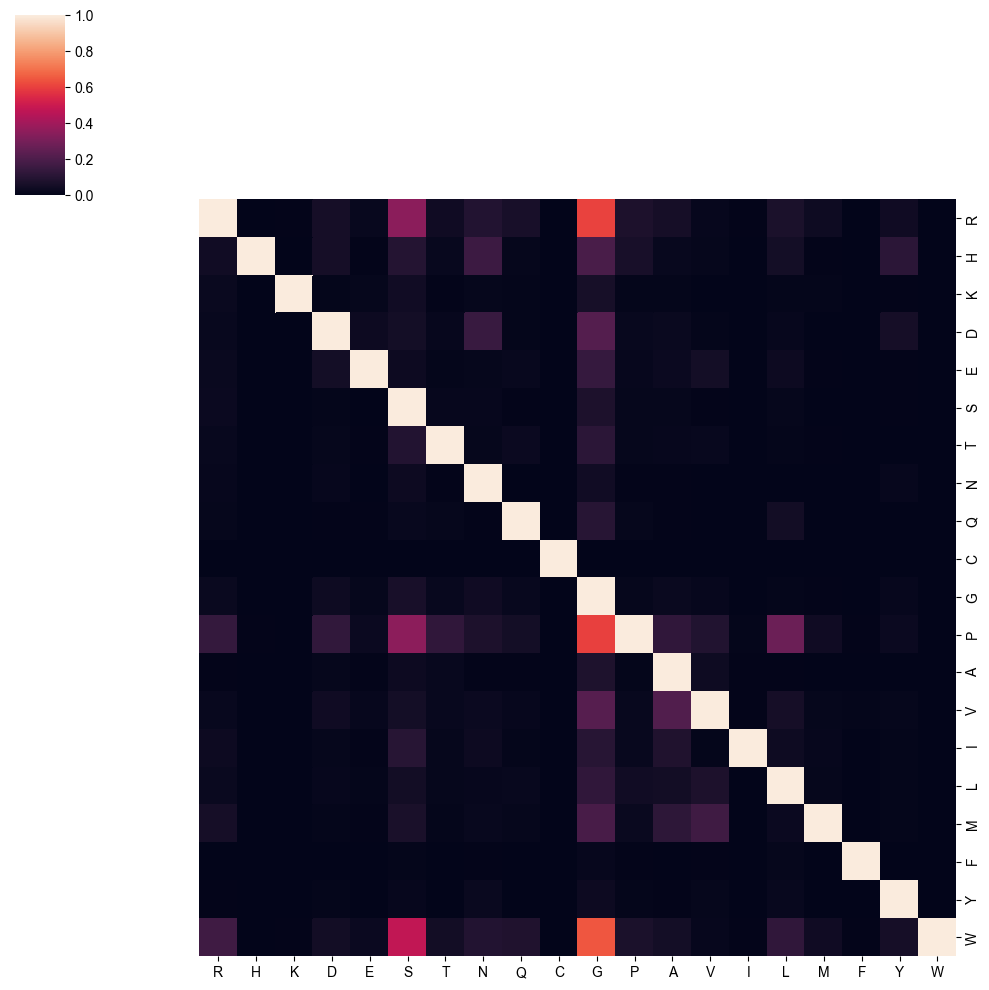

In [24]:
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tcr_deep_insight.utils._amino_acids import _AMINO_ACIDS_INDEX_REVERSE

labels = np.unique(FLATTEN(all_train_result['aa_gt']) + FLATTEN(all_train_result['aa_pred']))
cm = sklearn.metrics.confusion_matrix(
    FLATTEN(all_train_result['aa_gt']), 
    FLATTEN(all_train_result['aa_pred']), 
    labels=labels
)
cm = cm[:20,:][:,:20]
cm = pd.DataFrame(
    cm, 
    index=list(map(lambda x: _AMINO_ACIDS_INDEX_REVERSE[x], labels[:20])),
    columns=list(map(lambda x: _AMINO_ACIDS_INDEX_REVERSE[x], labels[:20]))
)
from tcr_deep_insight.utils._amino_acids import _AMINO_ACIDS_INDEX_REVERSE
sns.clustermap(cm, row_cluster=False, col_cluster=False, standard_scale='var')
plt.show()

## Cluster TCRs in reference datasets

In [ ]:
tdi.tl.get_pretrained_tcr_embedding(
    tcr_adata=tcr_reference_adata,
    bert_config=tdi.model.config.get_human_config(),
    checkpoint_path='./t_deep_insight/data/pretrained_weights/human_bert_tcr_768_v1.ckpt',
    pca_path='./t_deep_insight/data/pretrained_weights/human_bert_tcr_pca_v1.pkl',
    use_pca=True
)

In [ ]:
tcr_reference_adata.write_h5ad('./t_deep_insight/data/reference/human_tcr_reference_v2.h5ad')

<div class="alert alert-info">
<h2> Note </h2>
    
You should have faiss-gpu installed to set `gpu=1`. This is much faster than the CPU version. For more information, please see https://pypi.org/project/faiss-gpu/.

</div>

cluster TCR/GEX embedding without constraining same `label_key`

In [ ]:
tcr_cluster_result = tdi.tl.cluster_tcr(
    tcr_reference_adata,
    label_key='disease_type',
    gpu=0,
    pure_label = False,
    max_distance = 30.,
    max_cluster_size = 320
)

cluster TCR/GEX embedding constraining same `label_key`

In [7]:
tcr_cluster_result = tdi.tl.cluster_tcr(
    tcr_reference_adata,
    label_key='disease_type',
    gpu=0,
    pure_label = True,
    max_distance = 30.,
    max_cluster_size = 320
)

WARNING clustering 635393 points to 635393 centroids: please provide at least 24780327 training points


Mon Jun 26 17:00:45 2023	Iterative anchoring...


100%|███████████████████████████████████████████████████████████████████████████| 635393/635393 [03:30<00:00, 3017.69it/s]


Mon Jun 26 17:04:24 2023	Remove repetitive clusters...


100%|███████████████████████████████████████████████████████████████████████████| 170351/170351 [00:23<00:00, 7174.54it/s]


cluster TCR/GEX embedding constraining same `label_key` and only for a specific disease subset of reference data

In [ ]:
tcr_cluster_result = tdi.tl.cluster_tcr_from_reference(
    tcr_reference_adata[tcr_reference_adata.obs['disease_type'] == 'COVID-19'],
    tcr_reference_adata,
    label_key='disease_type_1',
    gpu=0,
    pure_label = True,
    max_distance = 30.,
    max_cluster_size = 320
)

<div class="alert alert-info">
<h2> Note </h2>
    
You should have `mafft` installed in your system to produce the logoplot below.

In **Ubuntu**, 

`sudo apt update`
`sudo apt install mafft`

In **MacOS**, please use HomeBrew

`brew install mafft`

    
In CentOS or other operating systems, please check In **CentOS**, please check https://mafft.cbrc.jp/alignment/software/linuxportable.html for manual installation.
    
    
</div>



saving the clustering result to file

In [ ]:
tcr_cluster_result.save_to_disk("/path/to/cluster_result")

reading the clustering result to file

In [11]:
tcr_cluster_result = tdi.load_tdi_result('../20231004_huardbv2_pan_cancer_TCRDeepInsightClusterResult_all_320/')

In [12]:
tcr_cluster_result

TDIResult object containing 533318 clusters

Transform the clustering result to long format

In [21]:
tcr_cluster_result.to_pandas_dataframe()

,CDR3a,CDR3b,TRAV,TRAJ,TRBV,TRBJ,individual,cluster_index
0,CAYRSAGTGKLIF,CSARRGRGIDEQYF,TRAV38-2DV8,TRAJ37,TRBV20-1,TRBJ2-7,MSK1302,1326041
1,CAYRSAKNYGGSQGNLIF,CSARNRRGGYEQYF,TRAV38-2DV8,TRAJ42,TRBV20-1,TRBJ2-7,D492,1326041
2,CAGAGAGSYQLTF,CSASRGRGRDEQYF,TRAV27,TRAJ28,TRBV20-1,TRBJ2-7,RA_69,1326041
3,CATAALYNKLIF,CSARGRGRGYEQYF,TRAV17,TRAJ4,TRBV20-1,TRBJ2-7,B4,1326041
4,CAAKGNYGQNFVF,CSARDGRGAYEQYF,TRAV13-1,TRAJ26,TRBV20-1,TRBJ2-7,COV_012,1326041
...,...,...,...,...,...,...,...,...
5769103,CVVNRGYNTDKLIF,CSATDSYEQYF,TRAV12-1,TRAJ34,TRBV20-1,TRBJ2-7,PT_8,554976
5769104,CALGDDKIIF,CSARTVSYEQYF,TRAV6,TRAJ30,TRBV20-1,TRBJ2-7,PEM11,554976
5769105,CVVFLADGGSQGNLIF,CSARVIYEQYF,TRAV12-1,TRAJ42,TRBV20-1,TRBJ2-7,PEM8,554976
5769106,CAVQEGGSARQLTF,CSAGQLYEQYF,TRAV20,TRAJ22,TRBV20-1,TRBJ2-7,6_ki0100110_CMVneg,554976


## Transfer GEX in query datasets from reference datasets

Once the single-cell immune profiling datasets are processed by CellRanger and the GEX and TCR information are integrated by Scanpy, and Scirpy, you would get a datasets including:
1) The raw gene expression matrix
2) The Full-length TCR sequence for each single-cell


And you would provide the sample name as well as the individual name to the dataset

In [ ]:
gex_query_adata = tdi.read_h5ad("some_new_query_data")

In [ ]:
tdi.model.VAEModel.setup_anndata(gex_query_adata, "/path/to/vae_checkpoint")
vae_model = tdi.model.VAEModel(
    gex_query_adata,
    batch_key="sample_name", 
    additional_batch_keys=["study_name"],
    batch_embedding='embedding', 
    device='cuda:0', 
    batch_hidden_dim=64,
    new_adata_key='undefined',
    label_key='label_1',
    additional_label_keys = ['label_2','label_3','label_4']
)

In [ ]:
vae_model.partial_load_state_dict(torch.load("/path/to/vae_checkpoint"))

In [ ]:
gex_query_adata.obsm["X_gex"] = vae_model.get_latent_embedding()

In [ ]:
gex_query_adata.obsm["X_umap"] = tdi.ut.transfer_umap(
    gex_query_adata.obsm["X_gex"],
    gex_reference_adata.obsm["X_gex"],
    gex_reference_adata.obsm["X_umap"],
    method='knn'
)['embedding']

## Cluster TCRs in querying datasets from reference datasets

In [6]:
tdi.pp.update(gex_query_adata)

In [ ]:
tcr_query_adata = tdi.pp.unique_tcr_by_individual(gex_query_adata)

In [10]:
tdi.pp.update_anndata(gex_query_adata)

Mon Jun 26 18:34:23 2023	TCRDeepInsight: initializing dataset
Mon Jun 26 18:34:23 2023	TCRDeepInsight: adding 'tcr' to adata.obs


In [57]:
tcr_query_adata.obs['disease_type'] = 'Disease'
tcr_reference_adata.obs['disease_type'] = 'Control'

In [31]:
tdi.tl.get_pretrained_tcr_embedding(
    tcr_adata=tcr_query_adata,
    bert_config=tdi.model.config.get_human_config(),
    checkpoint_path='./tcr_deep_insight/data/pretrained_weights/human_bert_tcr_768_v2.ckpt',
    pca_path='./tcr_deep_insight/data/pretrained_weights/human_bert_tcr_pca_v2.pkl',
    use_pca=True
)

Mon Jun 26 18:44:19 2023	Building BERT model
Mon Jun 26 18:44:20 2023	Loading BERT model checkpoints...
Mon Jun 26 18:44:21 2023	Computing TCR Embeddings...


100%|███████████████████████████████████████████████████████████████████████████████████| 568/568 [01:08<00:00,  8.27it/s]


Mon Jun 26 18:45:30 2023	Loading PCA model...


In [ ]:
tcr_query_adata.obs['disease_type'] = 'Disease'
tcr_reference_adata.obs['disease_type'] = 'Control'

tdi.tl.cluster_tcr_from_reference(
    tcr_query_adata,
    tcr_reference_adata,
    label_key='disease_type',
    include_label_keys=['Disease']
    gpu=0,
    pure_label = True,
    max_distance = 30.,
    max_cluster_size = 320
)